# Homework 2 : Bermudian Put and Longstaff-Schwartz


*Etudiant* : BAHOUS Youness 

**Objectif** : Programmer l'algorithme de Longstaff-Schwartz
 pour un Put bermudéen dans un modèle de Black-Scholes, c'est à dire un put que l'on peut exercer aux dates $k/N$, $k=0,\dots,N$. On prendra $r=0.04$, $\sigma=0.1$, $x_0=100$ et le strike $K=100$ avec $N=10$ dates jusqu'en $T=1$ et le payoff $\phi_k(x) = e^{-r k/N}(K-x)_+$.



### Parametres du modèle et importation des librairies

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
r = 0.04
sigma = 0.1
T = 1
S0 = 100
K = 100
N = 10

### Génération de réalisations 

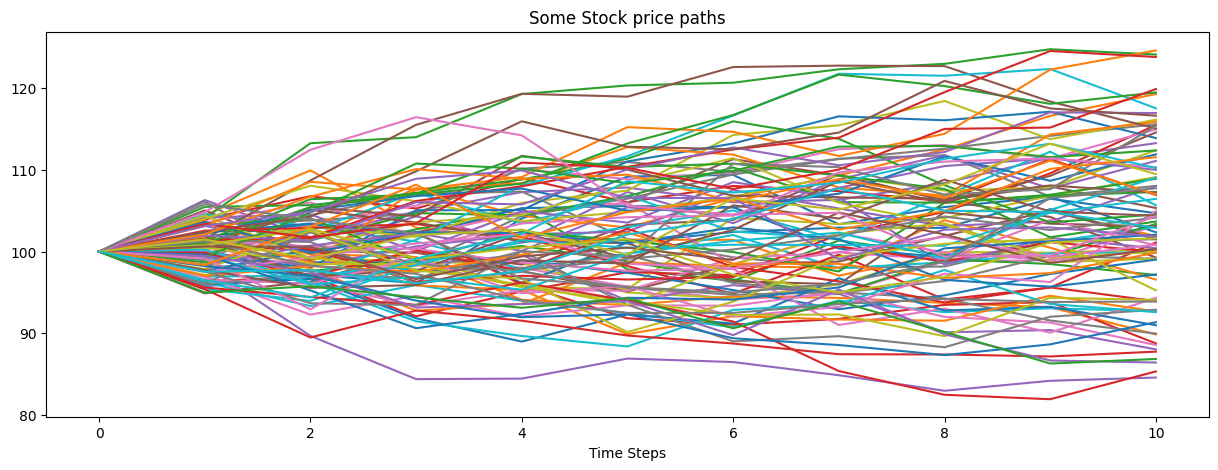

In [96]:
dt = T/N # time step
n = 1000000 # number of paths
df = np.exp(-r*dt) # discount factor
S = np.zeros((N+1, n)) # matrix of stock prices
S[0] = S0 # initial stock price
for t in range(1, N+1):
    z = np.random.randn(n) # random numbers
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)

plt.figure(figsize=(15, 5))
plt.plot(S[: , :100])
plt.title("Some Stock price paths")
plt.xlabel("Time Steps")
plt.show()

# Longstaff - Schwartz avec regression polynomiale en ordre 2

In [97]:
C = np.maximum(K -S[-1], 0) # option price at maturity
optimal_time = np.zeros(n , dtype = int) # optimal time to exercise the option

for t in range(N-1, 0, -1): # backward induction
    x = S[t]
    y = C*df
    X = np.column_stack((np.ones(x.shape) , x, x**2))
    reg = np.linalg.lstsq(X, y, rcond=None)[0]

    # exercise value
    exercise = K - x
    # continuation value
    cont = np.dot(X, reg)

    # exercisable paths
    exercisable = np.where(exercise > cont)
    for i in range(len(exercisable[0])):
        if exercisable[0][i] > 0:
            optimal_time[exercisable[0][i]] = t
    
    # non-exercisable paths
    non_exercisable = np.where(exercise <= cont)
    # Value of exercising the option when it is optimal
    C[exercisable] = exercise[exercisable]
    # Value of not exercising the option
    C[non_exercisable] = C[non_exercisable]*df

prix = np.mean(C*df)
variance = np.var(C*df)


In [98]:
print(f"price with order 2 polynomial regression is in the range {prix - 1.96*np.sqrt(variance)/np.sqrt(n)} and {prix + 1.96*np.sqrt(variance)/np.sqrt(n)} with a confidence of 95%")

price with order 2 polynomial regression is in the range 2.6029431663747613 and 2.616386222824255 with a confidence of 95%


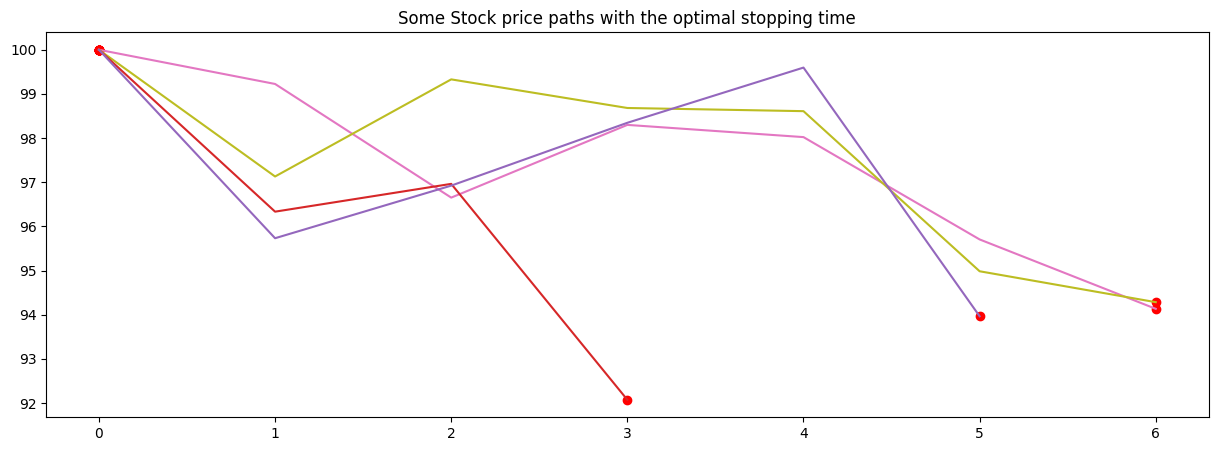

In [99]:
# HERE WE PLOT THE STOPPING TIMES 
plt.figure(figsize=(15, 5))

for i in range(min(20, n)):
    optimal_time_i = optimal_time[i]
    plt.plot(S[:optimal_time_i + 1, i])  # Only plot up to the optimal stopping time
    plt.scatter(optimal_time_i, S[optimal_time_i, i], color="red")

plt.title("Some Stock price paths with the optimal stopping time")
plt.show()


# Longstaff - Schwartz avec regression polynomiale en ordre 3

In [100]:
C = np.maximum(K -S[-1], 0) # option price at maturity
for t in range(N-1, 0, -1): # backward induction
    x = S[t]
    y = C*df


    # Regression
    X = np.column_stack((np.ones(x.shape) , x, x**2, x**3))
    reg = np.linalg.lstsq(X, y, rcond=None)[0]
    exercise = K - x
    cont = np.dot(X, reg)

    # exercisable paths
    exercisable = np.where(exercise > cont)
    # non-exercisable paths
    non_exercisable = np.where(exercise <= cont)
    # Value of exercising the option when it is optimal
    C[exercisable] = exercise[exercisable]
    # Value of not exercising the option
    C[non_exercisable] = C[non_exercisable]*df
    
prix = np.mean(C*df)
variance = np.var(C*df)


In [103]:
print(f"The price of the option with order 3 polynomial regression is {prix}")
print(f"price with order 3 polynomial regression is in the range {prix - 1.96*np.sqrt(variance)/np.sqrt(n)} and {prix + 1.96*np.sqrt(variance)/np.sqrt(n)} with a confidence of 95%")

The price of the option with order 3 polynomial regression is 2.6148462593253643
price with order 3 polynomial regression is in the range 2.6081174407315397 and 2.621575077919189 with a confidence of 95%


# Longstaff - Schwartz avec regression sur $(1,x,x^2,x^3,(K-x)^+)$

In [104]:
C = np.maximum(K -S[-1], 0) # option price at maturity
for t in range(N-1, 0, -1): # backward induction
    x = S[t]
    y = C*df
    X = np.column_stack((np.ones(x.shape) , x, x**2 , x**3 , np.maximum(K-x, 0)))
    reg = np.linalg.lstsq(X, y, rcond=None)[0]
    exercise = K - x
    cont = np.dot(X, reg)

    # exercisable paths
    exercisable = np.where(exercise > cont)
    # non-exercisable paths
    non_exercisable = np.where(exercise <= cont)
    # Value of exercising the option when it is optimal
    C[exercisable] = exercise[exercisable]
    # Value of not exercising the option
    C[non_exercisable] = C[non_exercisable]*df
prix = np.mean(C*df)
variance = np.var(C*df)

print(f"The price of the option with order 3 polynomial regression and the option itself is {prix}")
print(f"price with this regression is in the range {prix - 1.96*np.sqrt(variance)/np.sqrt(n)} and {prix + 1.96*np.sqrt(variance)/np.sqrt(n)} with a confidence of 95%")

The price of the option with order 3 polynomial regression and the option itself is 2.6148462593253643
price with this regression is in the range 2.6081174407315397 and 2.621575077919189 with a confidence of 95%
